[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_cmnd_tutorial.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# Composed Multivariate Normal Distribution (CMND): A tutorial

This notebook gives a short introduction to **MultiMin**: fitting and visualizing **Composed Multivariate Normal Distributions (CMND)**.

## Theoretical background

The core of `MultiMin` is the **Composed Multivariate Normal Distribution (CMND)**. The theory behind it posits that any multivariate distribution function $p(\tilde U):\Re^{N}\rightarrow\Re$, where $\tilde U:(u_1,u_2,u_3,\ldots,u_N)$ are random variables, can be approximated with arbitrary precision by a normalized linear combination of $M$ Multivariate Normal Distributions (MND):

$$
p(\tilde U) \approx \mathcal{C}_M(\tilde U; \{w_k\}_M, \{\mu_k\}_M, \{\Sigma_k\}_M) \equiv \sum_{i=1}^{M} w_i\mathcal{N}(\tilde U; \tilde \mu_i, \Sigma_i)
$$

where the multivariate normal $\mathcal{N}(\tilde U; \tilde \mu, \Sigma)$ with mean vector $\tilde \mu$ and covariance matrix $\Sigma$ is given by:

$$
\mathcal{N}(\tilde U; \tilde \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^{k} \det \Sigma}} \exp\left[-\frac{1}{2}(\tilde U - \tilde \mu)^{\rm T} \Sigma^{-1} (\tilde U - \tilde \mu)\right]
$$

The covariance matrix $\Sigma$ elements are defined as $\Sigma_{ij} = \rho_{ij}\sigma_{i}\sigma_{j}$, where $\sigma_i$ is the standard deviation of $u_i$ and $\rho_{ij}$ is the correlation coefficient between variable $u_i$ and $u_j$ ($-1<\rho_{ij}<1$, $\rho_{ii}=1$).

The normalization condition on $p(\tilde U)$ implies that the set of weights $\{w_k\}_M$ are also normalized, i.e., $\sum_i w_i=1$.


## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [33]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import multimin as mn
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)
deg = np.pi/180

import warnings
warnings.filterwarnings("ignore")

figprefix = "cmnd"

## Distribution basics

Below we define and visualize CMNDs before using them for fitting.

### Univariate normal distribution

The simplest case is a mixture of univariate normals. Here we create a CMND with two Gaussian components:

In [35]:
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

We can plot a sample from the distribution:

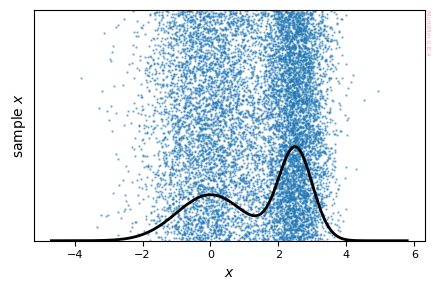

In [36]:
G = CMND.plot_sample(
    props=["x"],
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3
)
plt.savefig(f'gallery/{figprefix}_univariate_sample_hist.png')

You can generate random samples with `rvs`:

In [37]:
sample = CMND.rvs(5000)
sample[:10]

array([[ 1.2346658 ],
       [ 3.18819871],
       [-0.92121299],
       [-0.48274735],
       [-2.03678077],
       [ 2.14532057],
       [ 2.86172714],
       [-0.96293251],
       [ 0.31405467],
       [-1.99307374]])

You can evaluate the PDF at any point:

In [38]:
CMND.pdf(1.3)

0.10807882631874657

### Multivariate distributions

The main strength of **MultiMin** is combining multivariate normal distributions. Below we define a CMND with two three-variate normals:

In [39]:
weights = [0.5,0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5],]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
angles = [
    [10*deg, 30*deg, 20*deg],
    [-20*deg, 0*deg, 30*deg],
] 
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)
CMND = mn.ComposedMultiVariateNormal(mus=mus, weights=weights, Sigmas=Sigmas)

Preview the distribution with a 3D histogram:

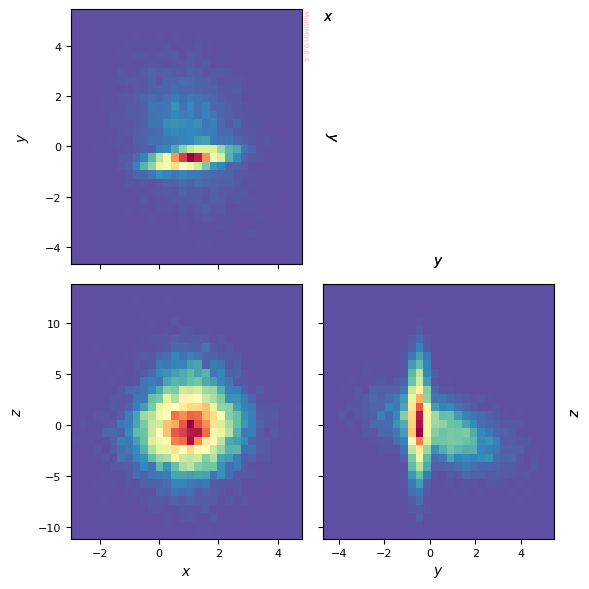

In [40]:
fig = CMND.plot_sample(
    figsize=3,
    props=["x", "y", "z"],
    hargs=dict(bins=30,cmap='Spectral_r', alpha=1)
)
plt.savefig(f'gallery/{figprefix}_3d_sample_density.png')

Another way to visualize the distribution is with **DensityPlot**, which shows pairwise projections. We use a sample of the data:

In [41]:
sample = CMND.rvs(5000)

Plot the sample (2D histograms and scatter on the panels):

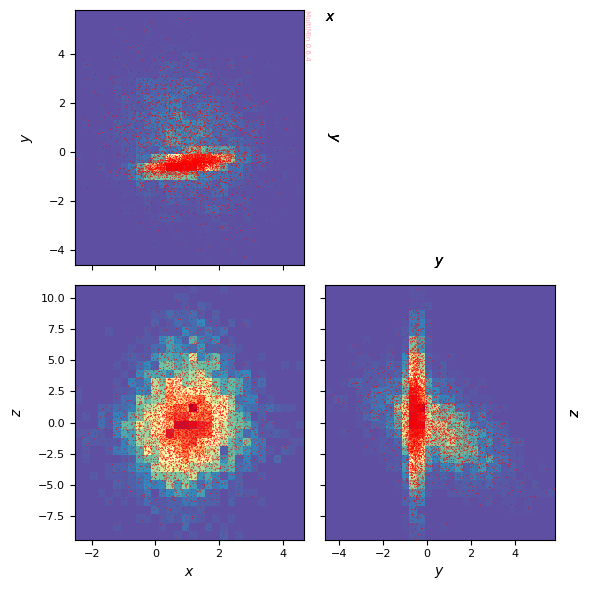

In [42]:
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
    z=dict(label=r"$z$",range=None),
)

G=mn.DensityPlot(properties,figsize=3)
hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(sample,**hargs)

sargs=dict(s=0.5,edgecolor='None',color='r')
hist=G.scatter_plot(sample,**sargs)

plt.savefig(f'gallery/{figprefix}_data_density_scatter.png')


We can also visualize the sample in 3D with Plotly (interactive):

In [43]:

fig = go.Figure(
    data=go.Scatter3d(
        x=sample[:, 0],
        y=sample[:, 1],
        z=sample[:, 2],
        mode="markers",
        marker={
            "size": 2,
            "color": sample[:, 2],
            "colorscale": "Viridis",
            "showscale": False,
        },
    )
)

fig.update_layout(
    scene={
        "xaxis_title": properties["x"]["label"].replace("$", ""),
        "yaxis_title": properties["y"]["label"].replace("$", ""),
        "zaxis_title": properties["z"]["label"].replace("$", ""),
        "aspectmode": "cube",
    },
    showlegend=False,
)

fig.show()
# Save 3D scatter (requires kaleido: pip install kaleido)
try:
    fig.write_image(f"gallery/{figprefix}_3d_scatter_plotly.png")
except Exception:
    pass

**DensityPlot** can also be used for univariate distributions (single-panel histogram and scatter):

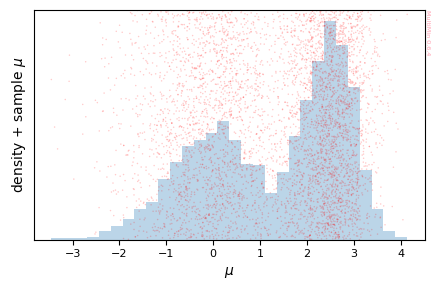

In [44]:
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

sample = CMND.rvs(5000)

properties=dict(
    x=dict(label=r"$\mu$",range=None),
)

G=mn.DensityPlot(properties,figsize=3)

G.plot_hist(
    sample,
    **dict(bins=30,cmap='Spectral_r', alpha=0.3),
)

sargs=dict(s=1.2,edgecolor='None',color='r')
G.scatter_plot(
    sample,
    **dict(s=1.2,edgecolor='None',color='r',alpha=0.2),
)
plt.savefig(f'gallery/{figprefix}_univariate_density_2gauss.png')

## Fitting data with CMND

We fit by minimizing the **negative normalized log-likelihood**

$$
-\frac{\log \mathcal{L}}{S} = -\frac{1}{S} \sum_{i=1}^{S} \log \mathcal{C}_M(\tilde{U}_i)
$$

over the CMND parameters. Lower values indicate a better fit.

This notebook demonstrates how to use the `multimin.multimin` module for handling multidimensional distributions, specifically designed for asteroid population analysis.

### Univariate normals

The goal of **MultiMin** is to fit a CMND to a given dataset. We start with a univariate example by generating data from a CMND and then fitting it:

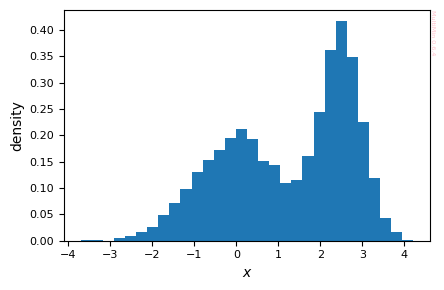

In [45]:
# Create the distribution
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

# Generate data
sample = CMND.rvs(10000)

# Plot the data
G = mn.DensityPlot(dict(x=dict(label=r"$x$",range=None)),figsize=3)
G.plot_hist(sample,**dict(bins=30))
plt.savefig(f'gallery/{figprefix}_univariate_histogram.png')

Fit with a single Gaussian component:

In [46]:
F = mn.FitCMND(ngauss=1, nvars=1)

Run the fitting procedure (use `advance=True` for better convergence):

In [47]:
F.fit_data(sample, advance=True)

Iterations:
Iter 0:
	Vars: [1.2, -1.8]
	LogL/N: 1.809451682705115
Iter 1:
	Vars: [1.2, -1.8]
	LogL/N: 1.809451615573238
Iter 2:
	Vars: [1.2, -1.8]
	LogL/N: 1.809451615573238


Plot the fit result (histogram of data and fitted PDF):

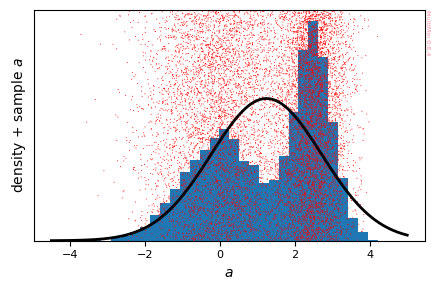

In [48]:
# Univariate: hargs → histogram of sample; fit shown as PDF
F.plot_fit(
    hargs=dict(bins=30),
    sargs=dict(s=0.5,edgecolor='None',color='r'),
    figsize=3
)
plt.savefig(f'gallery/{figprefix}_univariate_fit_1gauss.png')

A single Gaussian cannot capture the bimodal shape. Fitting with two Gaussians:

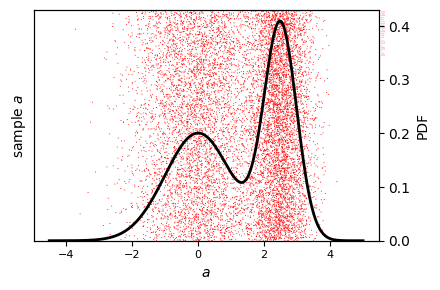

In [49]:
F = mn.FitCMND(ngauss=2, nvars=1)
F.fit_data(sample)
# Univariate: no hargs → scatter of sample; fit shown as PDF
F.plot_fit(
    sargs=dict(s=0.5, edgecolor='None', color='r'),
    figsize=3
)
plt.savefig(f'gallery/{figprefix}_univariate_fit_2gauss.png')

Visual inspection shows that the fitted distribution matches the sample well. For a quantitative check we can compare the true and fitted parameters:

In [50]:
CMND.tabulate('distance')

,w,mu_1,sigma_1
component,,,
1,0.5,0.0,1.00
2,0.5,2.5,0.25


In [51]:
F.cmnd.tabulate('distance')

,w,mu_1,sigma_1
component,,,
2,0.505686,0.010026,1.010566
1,0.494314,2.501600,0.242892


The tables confirm that the fitted parameters are close to the true ones.

You can export the fitted CMND as a callable function for use in other code:

In [52]:
code, cmnd = F.cmnd.get_function()

from multimin import nmd

def cmnd(X):

    mu1_1 = 2.5016
    sigma1_1 = 0.49284
    n1 = nmd(X, mu1_1, sigma1_1)

    mu2_1 = 0.010026
    sigma2_1 = 1.005269
    n2 = nmd(X, mu2_1, sigma2_1)

    w1 = 0.494314
    w2 = 0.505686

    return (
        w1*n1
        + w2*n2
    )


Evaluate the fitted PDF at a point:

In [53]:
cmnd(0.2)

np.float64(0.1971378273082552)

### Multivariate data

We can run a similar workflow for multivariate data:

In [54]:
weights = [0.5,0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5],]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
angles = [
    [10*deg, 30*deg, 20*deg],
    [-20*deg, 0*deg, 30*deg],
] 
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)

CMND = mn.ComposedMultiVariateNormal(mus=mus, weights=weights, Sigmas=Sigmas)

sample = CMND.rvs(5000)

First, fit with a single multivariate normal:

In [55]:
F = mn.FitCMND(ngauss=1, nvars=3)
F.fit_data(sample, advance=True)

Iterations:
Iter 0:
	Vars: [1.4, 0.29, 0.18, -2, -1.6, -0.61, 0.95, 0.83, 0.2]
	LogL/N: 5.713333073360637
Iter 1:
	Vars: [1.1, 0.08, 0.11, -2, -1.9, -0.93, 0.3, 0.25, 0.24]
	LogL/N: 5.484362253491071
Iter 2:
	Vars: [1, 0.0089, -0.015, -2.3, -2, -0.97, -0.22, 0.034, -0.5]
	LogL/N: 5.330367689622646
Iter 3:
	Vars: [1, -0.0086, -0.031, -2.3, -2, -0.96, -0.18, 0.028, -0.63]
	LogL/N: 5.3262950525258255
Iter 4:
	Vars: [1, -0.006, -0.03, -2.3, -2, -0.96, -0.18, 0.029, -0.64]
	LogL/N: 5.326261754226781
Iter 5:
	Vars: [1, -0.006, -0.03, -2.3, -2, -0.96, -0.18, 0.029, -0.64]
	LogL/N: 5.326261754226781


Check the fit (one Gaussian cannot capture two modes):

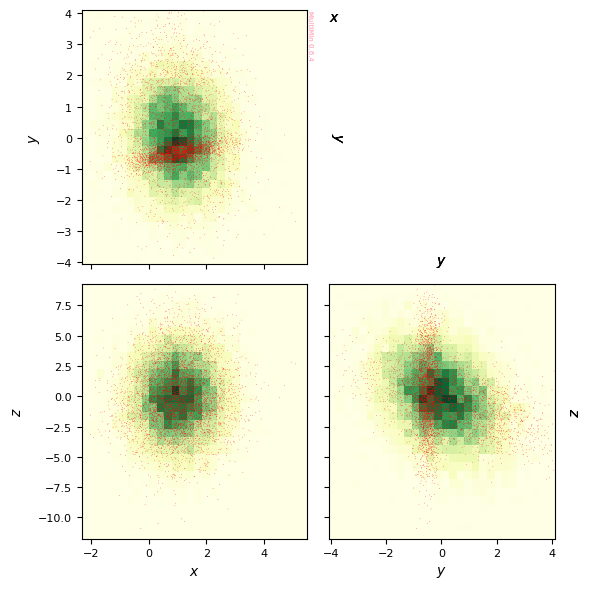

In [56]:
G=F.plot_fit(
    props=["x","y","z"],
    hargs=dict(bins=30,cmap='YlGn'),
    sargs=dict(s=0.2,edgecolor='None',color='r'),
    figsize=3
)

plt.savefig(f'gallery/{figprefix}_fit_2gauss_3d.png')


Fitting with two Gaussians gives a much better result:

Iterations:
Iter 0:
	Vars: [0, 0, 2.3, 1.6, -2.2, 0.98, -0.69, 1.6, -1.6, -1.5, -0.26, -2.2, -2.5, -0.78, 0.84, 0.41, -0.21, 1.2, 0.75, 0.25]
	LogL/N: 5.679323111720762
Iter 1:
	Vars: [-1.2, 0.0073, 1, 1, -1.1, 1, -0.45, 0.28, -1.9, -1.5, -1.4, -2.2, -3.5, -0.69, -0.42, -0.18, -1.2, 1.1, 0.14, 0.049]
	LogL/N: 5.036746926856545
Iter 2:
	Vars: [-0.42, 0.0068, 1, 0.85, -0.71, 1.1, -0.48, 0.41, -2.1, -1.7, -1.3, -2.4, -3.6, -0.74, -0.26, 0.012, -1.2, 1.2, -0.019, 0.034]
	LogL/N: 4.930093476655845
Iter 3:
	Vars: [-0.17, 0.007, 0.98, 0.59, -0.54, 1.1, -0.49, 0.39, -2.1, -1.7, -1.4, -2.4, -3.7, -0.72, -0.34, 0.077, -1.2, 1.2, -0.03, 0.04]
	LogL/N: 4.914674589436442
Iter 4:
	Vars: [-0.025, 0.0065, 1, 0.51, -0.48, 1, -0.49, 0.4, -2.1, -1.7, -1.4, -2.4, -3.7, -0.71, -0.38, 0.092, -1.2, 1.2, -0.026, 0.047]
	LogL/N: 4.912407683944606
Iter 5:
	Vars: [0.024, 0.0065, 1, 0.48, -0.47, 1, -0.49, 0.41, -2.1, -1.7, -1.4, -2.4, -3.7, -0.71, -0.39, 0.094, -1.2, 1.2, -0.021, 0.051]
	LogL/N: 4.912136730118354

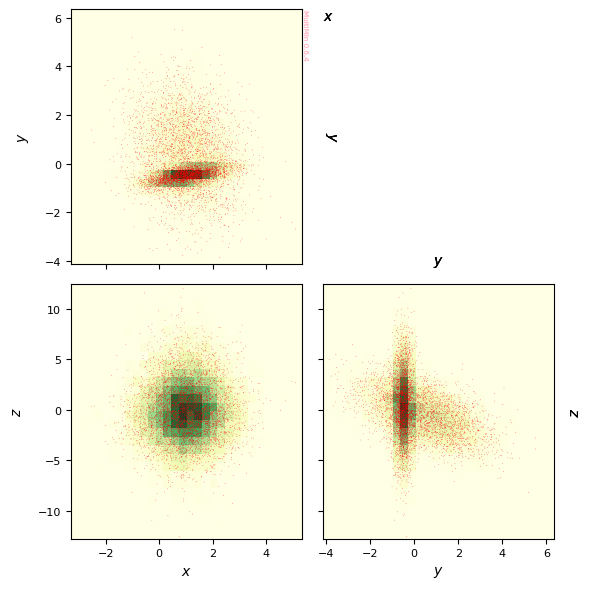

In [57]:
F = mn.FitCMND(ngauss=2, nvars=3)
F.fit_data(sample, advance=True)
G=F.plot_fit(
    props=["x","y","z"],
    hargs=dict(bins=30,cmap='YlGn'),
    sargs=dict(s=0.2,edgecolor='None',color='r'),
    figsize=3
)

plt.savefig(f'gallery/{figprefix}_fit_result_3d.png')


Much better!

Check the initial and final distributions:

Compare the true and fitted CMND parameters (e.g. means and weights):

In [58]:
CMND.tabulate('distance')

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.5,1.0,0.5,-0.5,1.064392,1.510773,2.077169,-0.211137,0.101191,-0.534075
2,0.5,1.0,-0.5,0.5,0.788611,0.241023,3.300000,0.539822,0.000000,0.000000


In [59]:
F.cmnd.tabulate('distance')

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
2,0.497789,1.025825,-0.493359,0.408969,0.799111,0.249807,3.292614,0.552429,-0.010724,0.025391
1,0.502211,1.018192,0.483356,-0.468709,1.054998,1.503963,2.047536,-0.190696,0.047161,-0.525137


The agreement is as expected for a good fit.

You can obtain the fitted PDF as explicit code or a callable:

In [60]:
code, cmnd = F.cmnd.get_function()

from multimin import nmd

def cmnd(X):

    mu1_1 = 1.018192
    mu1_2 = 0.483356
    mu1_3 = -0.468709
    mu1 = [mu1_1, mu1_2, mu1_3]
    Sigma1 = [[1.113021, -0.302574, 0.101875], [-0.302574, 2.261903, -1.617115], [0.101875, -1.617115, 4.192404]]
    n1 = nmd(X, mu1, Sigma1)

    mu2_1 = 1.025825
    mu2_2 = -0.493359
    mu2_3 = 0.408969
    mu2 = [mu2_1, mu2_2, mu2_3]
    Sigma2 = [[0.638578, 0.110278, -0.028217], [0.110278, 0.062403, 0.020884], [-0.028217, 0.020884, 10.841306]]
    n2 = nmd(X, mu2, Sigma2)

    w1 = 0.502211
    w2 = 0.497789

    return (
        w1*n1
        + w2*n2
    )


Test the callable at a point:

In [61]:
cmnd([0.2, 0.4, -0.2])

np.float64(0.008509769943558593)

Equivalently, use the CMND's `pdf` method:

In [62]:
F.cmnd.pdf([0.2, 0.4, -0.2])

0.008509770603768648

## LaTeX outputs

For papers or reports you can export the fitted function in LaTeX:

In [63]:
funcion, _ = F.cmnd.get_function(type='latex')

$$f(\mathbf{x}) = w_1 \, \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1) + w_2 \, \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2)$$

where

$$w_1 = 0.502211$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 1.018192 \\ 0.483356 \\ -0.468709 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 1.113021 & -0.302574 & 0.101875 \\ -0.302574 & 2.261903 & -1.617115 \\ 0.101875 & -1.617115 & 4.192404 \end{array}\right)$$

$$w_2 = 0.497789$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} 1.025825 \\ -0.493359 \\ 0.408969 \end{array}\right)$$
$$\mathbf{\Sigma}_2 = \left( \begin{array}{ccc} 0.638578 & 0.110278 & -0.028217 \\ 0.110278 & 0.062403 & 0.020884 \\ -0.028217 & 0.020884 & 10.841306 \end{array}\right)$$

Here the normal distribution is defined as:

$$\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^{{k}} \det \mathbf{\Sigma}}} \exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \mathbf{\Sigma}^{{-1}} (\

You can also output the parameter table in LaTeX:

In [64]:
latex_table = F.cmnd.tabulate(type='latex')

\begin{table*}
\begin{tabular}{lrrrrrrrrrr}
\hline
$k$ & $w$ & $\mu_{1}$ & $\mu_{2}$ & $\mu_{3}$ & $\sigma_{1}$ & $\sigma_{2}$ & $\sigma_{3}$ & $\rho_{12}$ & $\rho_{13}$ & $\rho_{23}$ \\
\hline
1 & 0.5022 & 1.018 & 0.4834 & -0.4687 & 1.055 & 1.504 & 2.048 & -0.1907 & 0.04716 & -0.5251 \\
2 & 0.4978 & 1.026 & -0.4934 & 0.409 & 0.7991 & 0.2498 & 3.293 & 0.5524 & -0.01072 & 0.02539 \\
\hline
\end{tabular}
\end{table*}


---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga